# Project 1 - Supervised Learning
## Part A - Logistic Regression

# 1.
At this step the libraries that were used are being loaded. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

Below, the dataset is loaded using pandas library and the first 5 and last 5 rows of the DataFrame are printed.

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


By using df.describe(), a table with statistics for each variable is created. 
For the Pregnancies variable, the mean value is 3.845 and the standard deviation is 3.36, showing that the spread of that variable is high. The minimum value is 0 and the maximum is 17. 
For the Glucose variable, the mean value is 120.894 and the standard deviation is 31.972, showing that most values appear to be close to the mean value. The maximum value is 199 and the minimum is 0. That minimum value is not realistic. 
The variable BloodPressure, has a mean value of 69.105 and it's standard deviation is 19.355, indicating once again that most values are centered mostly around the mean. Its minimum value is 0, which also is unrealistic and its maximum value is 122.
The variable SkinThickness, has a mean value of 20.53 and a standard deviation of 15.95. This indicates that the mean value is not representative of the spread. The minimum is 0, which once again is not possible and the maximum value is 99. 
Insulin has a mean value of 79.79 and a standard deviation of 115.24. Such a high value of standard deviation often means that the variable takes extreme values. Moreover, the minimum value is once again 0 (a non realistic value which is highly problematic if the variable minimizes often) and a maximum of 846.
BMI has a mean value of 31.99 and std of 7.884. The spread of values appears to be fairly normal. However the minimum is again 0 (non realistic) and the maximum is 67.
The variable DiabetesPedigreeFunction has a mean value of 0.471 and a standard deviation of 0.331. The mean value is 0.078 and the maximum is 2.42, both appearing reasonable.
For the Age variable, the mean value is 33.24 and the std is 11.76. The minimum value is 21, indicating that there are samples missing for younger ages and the maximum is 81.
Finally, the target variable Outcome, has a mean value of 0.34 and a standard deviation of 0.47. This indicates that the distribution between values of 0 and 1 is not equal, with more 0 samples appearing. The minimum is 0 and the maximum value is 1, which is to be expected since those are the only 2 discrete values of that variable.


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The histograms for each independent value are printed along with a bar plot for Outcome variable, since it only takes 2 discrete values (0 and 1).

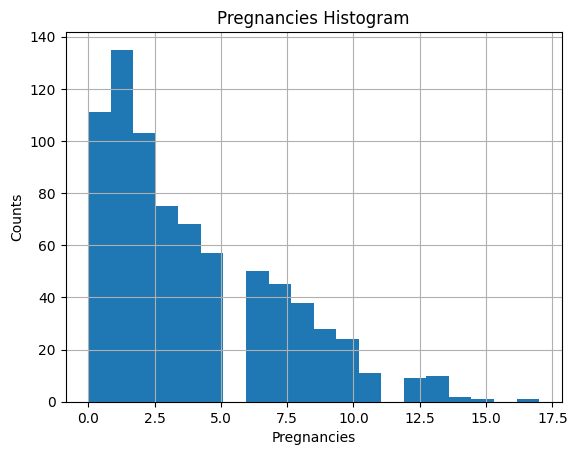

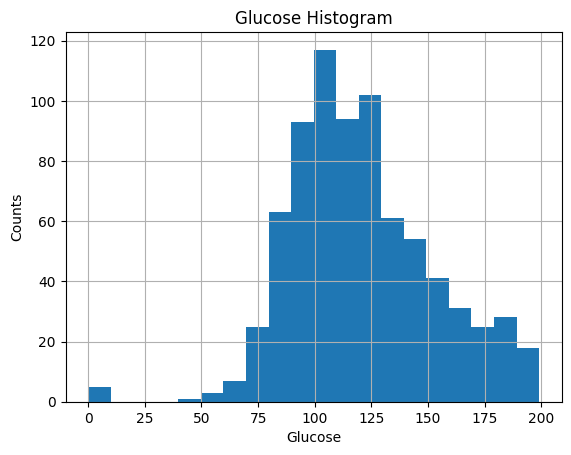

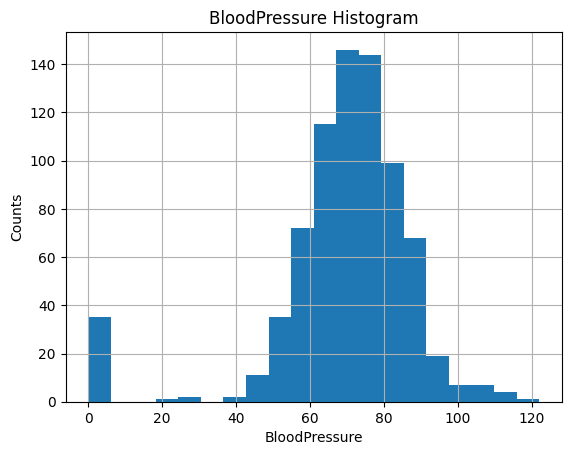

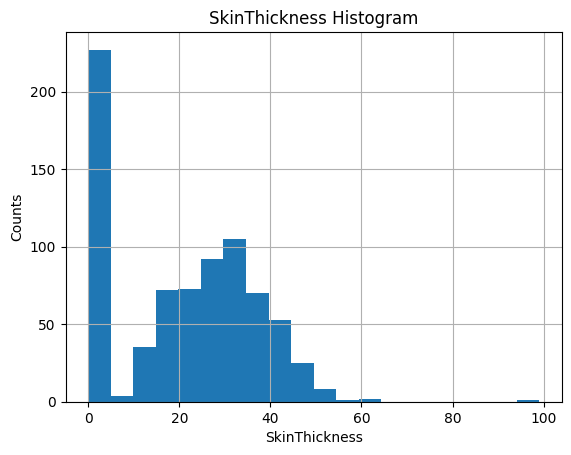

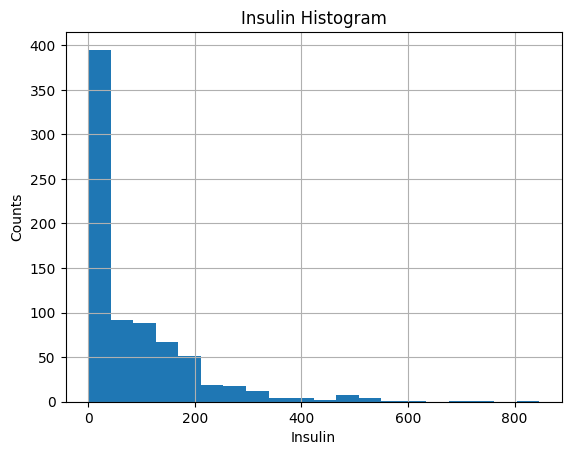

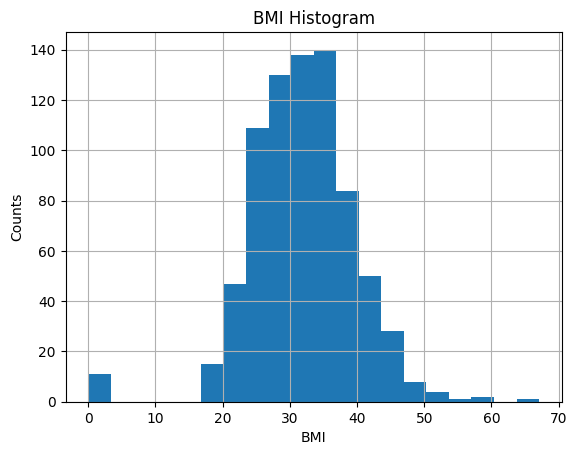

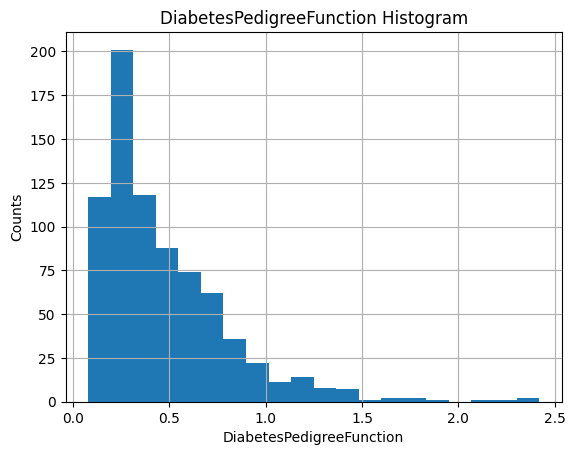

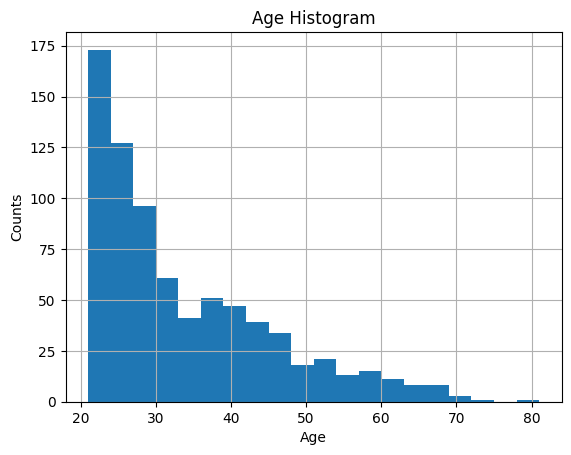

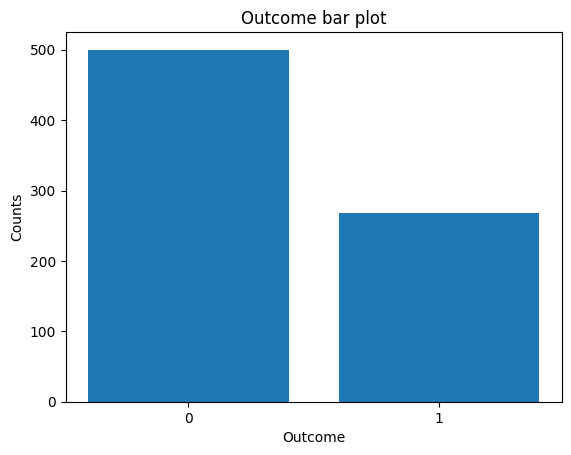

In [4]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

rowInd0, rowInd1 = 0,0
for i in df['Outcome']:

    if i == 0:
        rowInd0 +=1
    else:
        rowInd1 +=1

plt.bar(['0','1'],[rowInd0,rowInd1])
plt.title('Outcome bar plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

# 2.
From the plots above, it is clear that the quality of the data is not ideal. For Insulin and SkinThickness variables, the most common value is 0, which is not reallistically possible for either variable, indicating that there are more than 350 missing values for Insuling and at least 200 missing for SkinThickness. Furthermore, most variables appear to be unevenly spread. For example, younger patients are much more numerous and the output values also are also imbalanced.

# 3.
The distribution of the Age variable is particularly problematic. The minimum value is 21 and most values are concentrated in younger ages. Not only there aren't any samples for younger patients, but for older ages where diabetes appears more frequently the data is also limited. This can be problematic for predictive models, since there are insufficient data for middle aged people and older adults while there is an overrepresentation for young adults.

# 4.
According to clinical studies, if a patient has high glucose levels, there is a high chance of developing diabetes. This can be noticed from the histograms and statistical tables that are printed below describing glucose values for Outcome of 0 and 1. The mean value of glucose for negative patients is 109.98 and the standard deviation is 26.14. For positive samples, the mean value is 141.25 and the standard deviation is 31.939. From the histograms, if the incorrect minimum values of 0 are ignored, it appears that for positive diabetes patients glucose levels start at 75 and negatives appear to start between 25 and 50. Therefore, there is a clear correlation between glucose levels and the occurrence of diabetes.

0
        Glucose  Outcome
count  500.0000    500.0
mean   109.9800      0.0
std     26.1412      0.0
min      0.0000      0.0
25%     93.0000      0.0
50%    107.0000      0.0
75%    125.0000      0.0
max    197.0000      0.0

1
          Glucose  Outcome
count  268.000000    268.0
mean   141.257463      1.0
std     31.939622      0.0
min      0.000000      1.0
25%    119.000000      1.0
50%    140.000000      1.0
75%    167.000000      1.0
max    199.000000      1.0



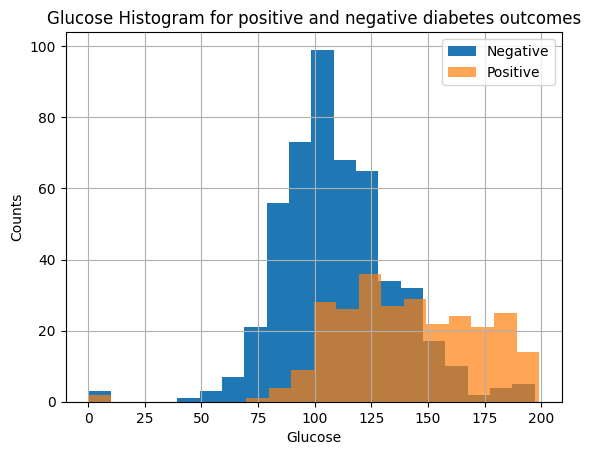

In [5]:
glucoseOutcome = df[['Glucose', 'Outcome']]

groupedDataFrame = glucoseOutcome.groupby('Outcome')

for outcome, group in groupedDataFrame:
    print(outcome)
    print(group.describe())
    print()
    if outcome == 0:
        group['Glucose'].hist(bins=20)
    else:
        group['Glucose'].hist(bins=20,alpha=0.7)
    plt.title('Glucose Histogram for positive and negative diabetes outcomes')
    plt.xlabel('Glucose')
    plt.ylabel('Counts')
    plt.legend(['Negative','Positive'])
plt.show()



# 5.
At this stage, numpy arrays are created for the independent variables (x) and for the Outcome variable (y).
Using the function train_test_split of the sklearn library, the data are split into a training set and a validation set with seed =0. By printing the amount of samples for x and y numpy arrays of both sets, the correct 70%/30% split is confirmed.


In [6]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
#x.shape, y.shape

In [7]:
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print("x used for training:" , x_train.shape,
      "\ny used for training:",y_train.shape,
      "\nx used for validation:" , x_test.shape,
      "\ny used for validation:" , y_test.shape)

x used for training: (537, 8) 
y used for training: (537,) 
x used for validation: (231, 8) 
y used for validation: (231,)


# 6.
Using the built-in model of logistic regression by sklearn for classifying patients for diabetes, a model is trained with seed=0, using the x and y arrays of the training set. Later, the classification is tested by using x from the training set to predict y_train and x in the test set to predict y_test. Finally, the accuracy of the model is printed for both train data and test data. Test set appears to perform slightly better than training set accuracy (test:77.92%, train: 76.54%).

In [8]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test = round(accuracy_test*100, 2)

print(f'The accuracy of the model in train data is: {accuracy_percentage_train}%')
print(f'The accuracy of the model in test data is: {accuracy_percentage_test}%')

The accuracy of the model in train data is: 76.54%
The accuracy of the model in test data is: 77.92%


# 7.
To test the classificaiton performance of the model in different age groups, a bar plot with the accuracy for different test samples is created (0-25, 25-50, >50). The results show a significant decrease in accuracy for middle-age patients (25-50) compared to the young adult patients (0-25) and the older adults (>50).

The accuracy of the model in age range 0-25 is: 85.56%
The accuracy of the model in age range 25-50 is: 72.79%
The accuracy of the model in age range 50+ is: 90.48%


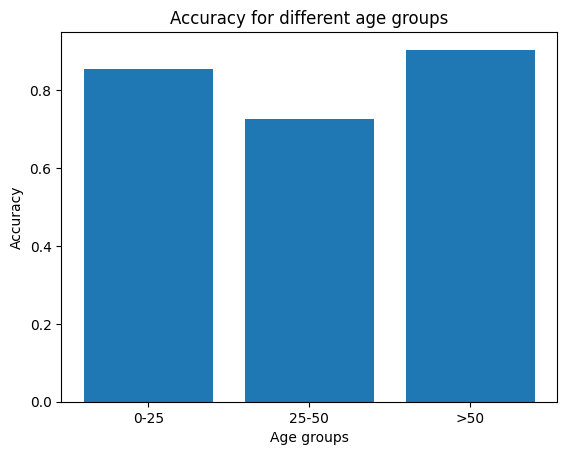

In [9]:
age_index = 7

mask0to25 = (x_test[:, age_index] >= 0) & (x_test[:, age_index] <= 25)
x_test_0to25 = x_test[mask0to25]
y_test_0to25 = y_test[mask0to25]
y_pred_0to25 = model.predict(x_test_0to25)
accuracy_0to25 = accuracy_score(y_test_0to25, y_pred_0to25)
accuracy_percentage_0to25 = round(accuracy_0to25*100, 2)
print(f'The accuracy of the model in age range 0-25 is: {accuracy_percentage_0to25}%')

mask25to50 = (x_test[:, age_index] >= 25) & (x_test[:, age_index] <= 50)
x_test_25to50 = x_test[mask25to50]
y_test_25to50 = y_test[mask25to50]
y_pred_25to50 = model.predict(x_test_25to50)

accuracy_25to50 = accuracy_score(y_test_25to50, y_pred_25to50)
accuracy_percentage_25to50 = round(accuracy_25to50*100, 2)
print(f'The accuracy of the model in age range 25-50 is: {accuracy_percentage_25to50}%')

mask_50 = x_test[:, age_index] > 50
x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)

accuracy_50 = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_50 = round(accuracy_50*100, 2)
print(f'The accuracy of the model in age range 50+ is: {accuracy_percentage_50}%')


plt.bar(['0-25','25-50','>50'],[accuracy_0to25,accuracy_25to50,accuracy_50])
plt.title('Accuracy for different age groups')
plt.xlabel('Age groups')
plt.ylabel('Accuracy')
plt.show()


# 8.
For this specific application, false negatives are much worse than false positive results. To predict that a patient has diabetes even though its false can easily be corrected with further medical exams. But in a false negative case, further exams might not even happen, leaving a patient with high chances of undiagnosed diabetes.

# 9.
Here steps 5 and 6 are repeated with different seeds (0 to 9). The average of accuracy and its standard deviation are calculated and printed.

In [10]:
acc_list_train = []
acc_list_test = []
for seed in range(0,10):

  test_size = 0.3
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

  model = LogisticRegression(max_iter=1000, random_state=seed,)
  model.fit(x_train, y_train)

  y_pred_train = model.predict(x_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_percentage_train = round(accuracy_train*100, 2)
  y_pred_test = model.predict(x_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  accuracy_percentage_test = round(accuracy_test*100, 2)
  acc_list_train.append(accuracy_percentage_train)
  acc_list_test.append(accuracy_percentage_test)


print("average accuracy for train set:")
print(np.mean(acc_list_train))
print("average accuracy for test set:")
print(np.mean(acc_list_test))
print("standard deviation for train set:")
print(np.std(acc_list_train))
print("standard deviation for test set:")
print(np.std(acc_list_test))


average accuracy for train set:
77.65299999999999
average accuracy for test set:
77.27
standard deviation for train set:
1.2132934517255065
standard deviation for test set:
1.8689087725194093


# 10.
Here MinMaxScaler from sklearn library is used to normalize the variables except Outcome (0 - 1 values, already normalized). By training the model using the normalized train data, the extracted coefficients (features) can now reflect their importance and not be influenced by scale. The 3 most important features appear to be Glucose, BMI and DiabetesPedigreeFunction, in descending order. This makes intuitive sense since all 3 of them are really closely related to diabetes.  

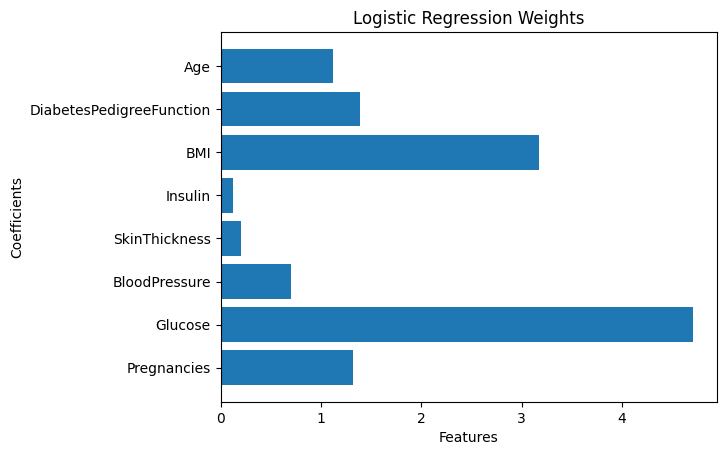

In [11]:
scaler = MinMaxScaler()
normalize_train = scaler.fit_transform(x_train)
normalize_test = scaler.transform(x_test)
model.fit(normalize_train, y_train)
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)

plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


## ## Part A - Linear Regression

# 1.
If only Pregnancies, BloodPressure, BMI and Age are used to predict Glucose levels, patients could estimate their glucose levels easily at home and if its >170, then they could proceed with medical exams.
At this step after creating the new x numpy array containing Pregnancies, BloodPressure, BMI and Age variables and the new y variable containing the Glucose variable, data is split once again into train and validation sets (70%/30%) using seed=0.


In [12]:
input_df = df.drop(columns=['Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome'])
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print("x used for training:" , x_train.shape,
      "\ny used for training:",y_train.shape,
      "\nx used for validation:" , x_test.shape,
      "\ny used for validation:" , y_test.shape)

x used for training: (537, 4) 
y used for training: (537,) 
x used for validation: (231, 4) 
y used for validation: (231,)


# 2.
Using LinearRegression from sklearn library, the model is trained and then tested using x_test. The predicted glucose values (y_pred_test) are then compared to y_test to compute the Mean Absolute Error. MAE is used instead of MeanSquaredError to show the accuracy because it has the same unit as the target variable, meaning that it can easily be undestood. MSE is mostly used as a loss function for training rather than an overall accuracy metric  and it's also useful for emphasis to outliers.

In [13]:

reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred_test = reg.predict(x_test)

mae = np.mean(np.abs(y_test - y_pred_test))
print(f'The MAE of the model in test data is: {mae}')



The MAE of the model in test data is: 23.599990462075155


# 3.
Using Lasso Regression and by using 0.2, 0.4, 0.6, 0.8, 1.0 as different alpha values, a list with MAE of each model is constructed and printed.

In [14]:
from sklearn import linear_model
acc_list = []
for a in [0.2, 0.4, 0.6, 0.8, 1.0]:
  
  clf = linear_model.Lasso(alpha=a)

  clf.fit(x_train, y_train)
  y_pred_train = clf.predict(x_train)
  y_pred_test = clf.predict(x_test)

  mae = np.mean(np.abs(y_test - y_pred_test))
  acc_list.append(mae)

print(acc_list)



[23.594203291229192, 23.58841532130485, 23.58262934003747, 23.576843358770088, 23.571057628091296]


# 4.
Here, x_train and x_test are first normalized to extract the least imporant feature, which is Pregnancies. Afterwards, a linear model without that feature is trained and tested using MAE.

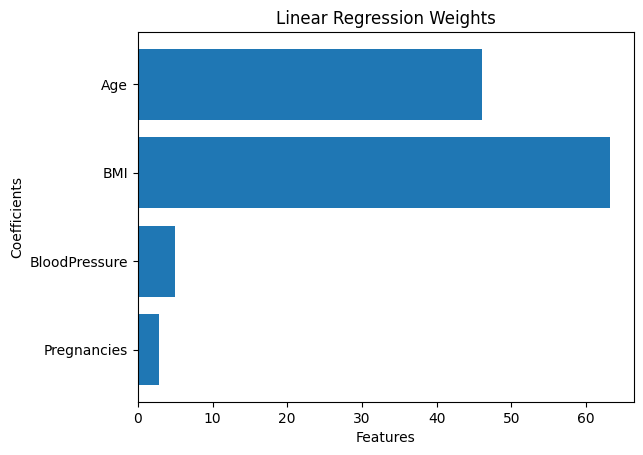

The MAE of the model in test data is: 23.587603134741844


In [15]:
reg = LinearRegression()
scaler = MinMaxScaler()
normalize_train = scaler.fit_transform(x_train)
normalize_test = scaler.transform(x_test)

reg.fit(normalize_train, y_train)
coeffs = reg.coef_
importance_weights = np.abs(coeffs)

plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


x_train_without_pregnancies = x_train[:, 1:]
x_test_without_pregnancies = x_test[:, 1:]
reg.fit(x_train_without_pregnancies, y_train)
y_pred_test = reg.predict(x_test_without_pregnancies)
mae = np.mean(np.abs(y_test - y_pred_test))
print(f'The MAE of the model in test data is: {mae}')